### 영상의 밝기 조절

- 화소처리
    - f : transfer function 
```
dst(x,y) == f(src(x,y))
```

- 밝기 조절의 개념
    - 이미지는 0~255까지 표현되기 때문에 255보다 넘으면 255로 처리하고 음수가 나오면 0으로 처리한다
```
dst(x,y) == saturate(src(x,y)+n)
``` 


### 덧셈 연산

cv2.add(src1,src2, dst = None, mask = None, dtype = None) -> dst

- src1 : 첫 번재 영상 또는 스칼라
- src2 : 두 번째 영상 또는 스칼라
- dst : 덧셈 연산의 결과 영상
- mask : 마스크 영상
- dtype : 출력 영상(dst)의 타입
- 참고사항
    - 스칼라는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
    - dst를 함수 인자로 전달하려면 dst의 크기가 src1,src2와 같아야 하며, 타입이 적절해야 함

### 가중치 합

```
dst(x,y) == saturate(α * src1(x,y) + β * src2(x,y))
```

- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정
- 보통 α + β = 1이 되도록 설정 -> 두 입력 영상의 평균 밝기를 유지

In [3]:
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import sys 

/tmp/ipykernel_25100/2438520070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### GRAYSCALE 영상 밝기 조절

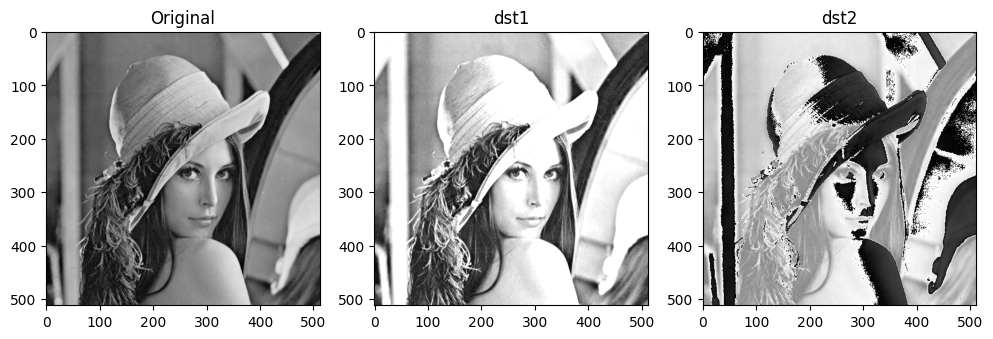

In [3]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.add(src, 100)
dst2 = src + 100

plt.figure(figsize = (12,8))
fig = plt.subplot(1, 3, 1)

plt.imshow(src, cmap='gray')
plt.title('Original')

fig = plt.subplot(1, 3, 2)

plt.imshow(dst1, cmap='gray')
plt.title('dst1')
fig = plt.subplot(1, 3, 3)

plt.imshow(dst2, cmap='gray')
plt.title('dst2')

plt.show()

# cv2.imshow('src', src)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)

# cv2.waitKey()
# cv2.destroyAllWindows()


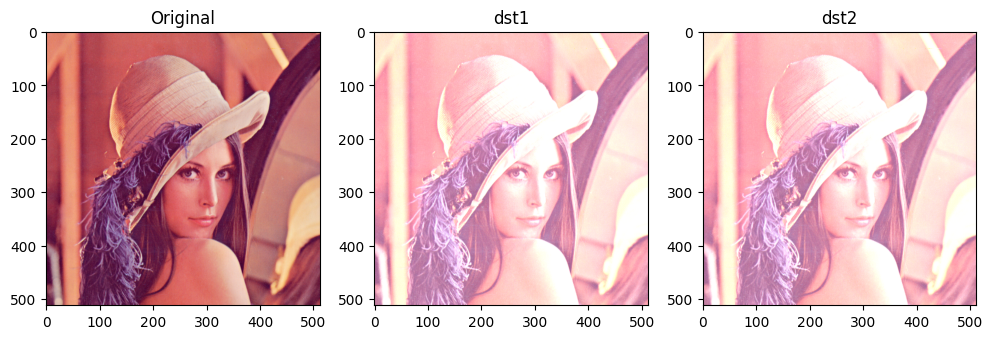

In [4]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

dst1 = cv2.add(src,(100,100,100,0))

dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)

plt.figure(figsize = (12,8))
fig = plt.subplot(1, 3, 1)

plt.imshow(src, cmap='gray')
plt.title('Original')

fig = plt.subplot(1, 3, 2)

plt.imshow(dst1, cmap='gray')
plt.title('dst1')
fig = plt.subplot(1, 3, 3)

plt.imshow(dst2, cmap='gray')
plt.title('dst2')

plt.show()

# cv2.imshow('src', src)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
dst1 = cv2.add(src, 100)
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)


cv2.waitKey()
cv2.destroyAllWindows()

![Screenshot from 2024-01-30 14-50-36.png](<attachment:Screenshot from 2024-01-30 14-50-36.png>)
![Screenshot from 2024-01-30 14-51-03.png](<attachment:Screenshot from 2024-01-30 14-51-03.png>)
![Screenshot from 2024-01-30 14-51-22.png](<attachment:Screenshot from 2024-01-30 14-51-22.png>)

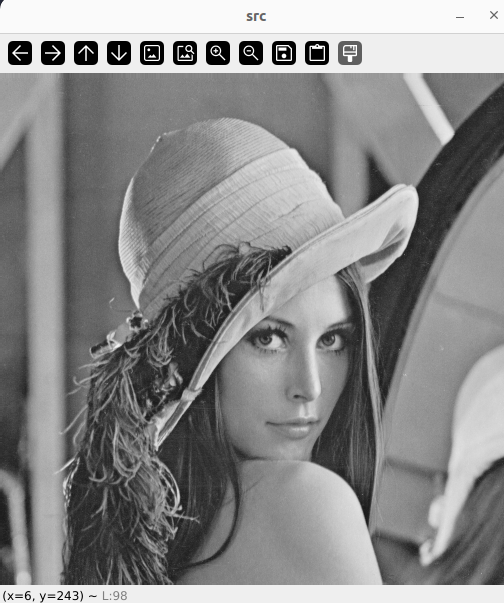
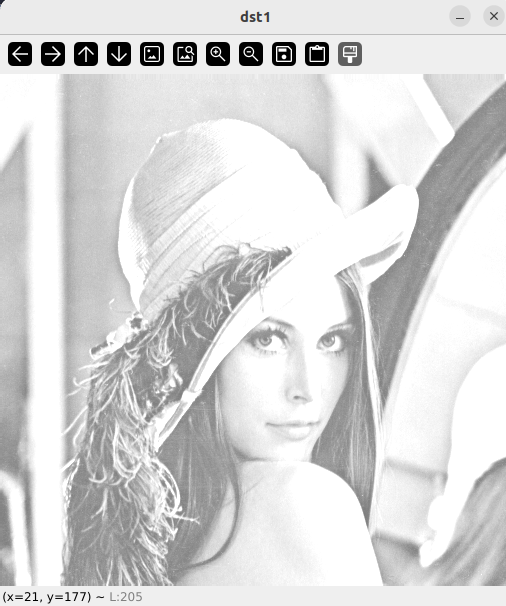
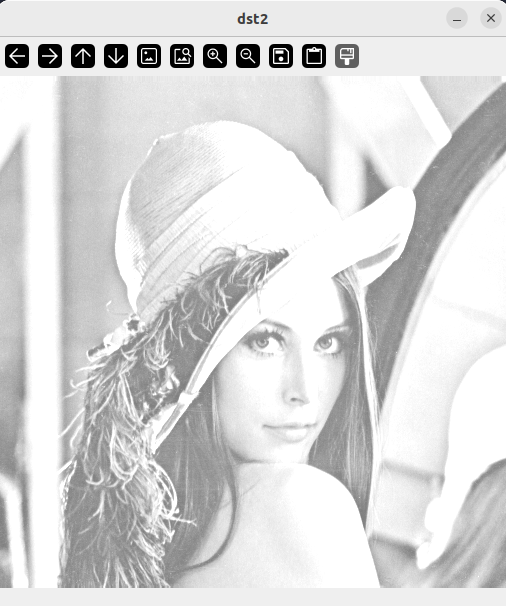

In [5]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()
    
dst1 = cv2.add(src, (100, 100, 100, 0))
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2 ', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

![Screenshot from 2024-01-30 14-54-25.png](<attachment:Screenshot from 2024-01-30 14-54-25.png>)
![Screenshot from 2024-01-30 14-54-42.png](<attachment:Screenshot from 2024-01-30 14-54-42.png>)
![Screenshot from 2024-01-30 14-54-58.png](<attachment:Screenshot from 2024-01-30 14-54-58.png>)

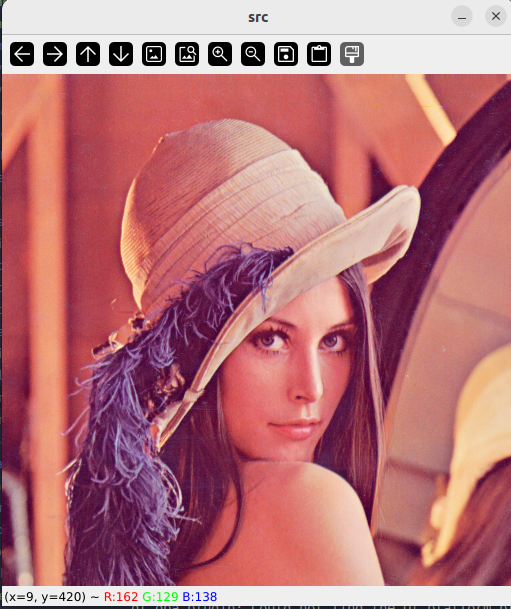
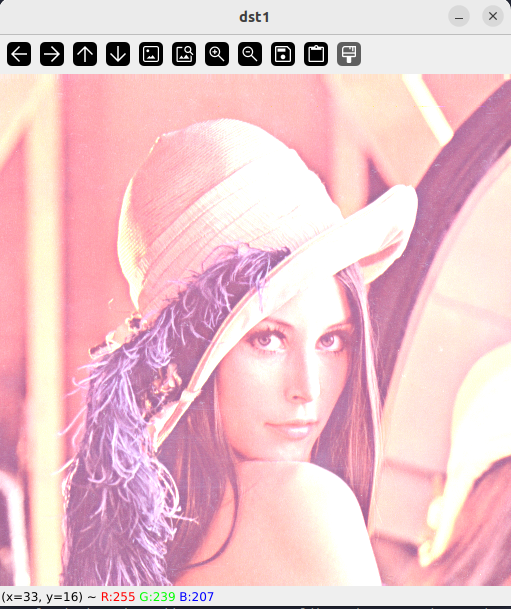
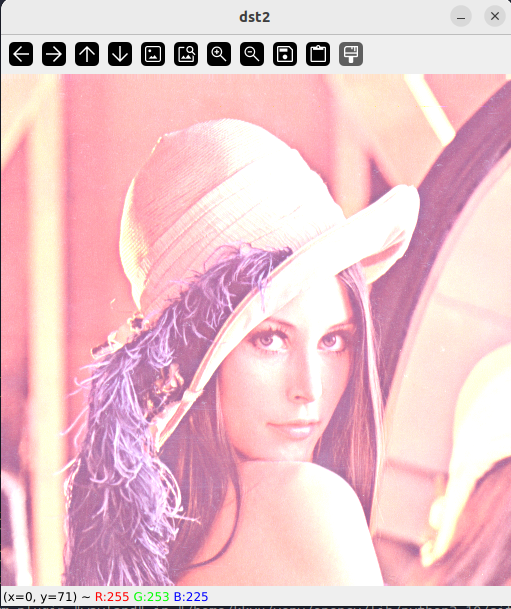

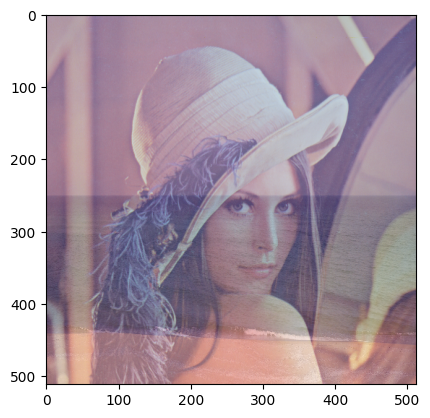

In [7]:
src1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp')
src2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/sky.bmp')

resize_src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.addWeighted(src1=src1, alpha = 0.5, src2=resize_src2,
                      beta = 0.5, gamma=0)

show_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(show_dst)

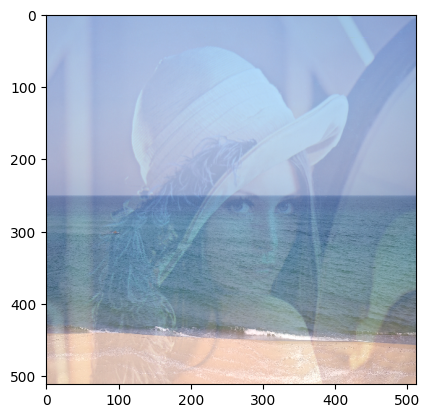

In [8]:
src1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp')
src2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/sky.bmp')

resize_src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.addWeighted(src1=src1, alpha = 0.2, src2=resize_src2,
                      beta = 0.9, gamma=0)

show_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(show_dst)

- 주변에 밝으면 밝을수록 어두어짐  -> dst

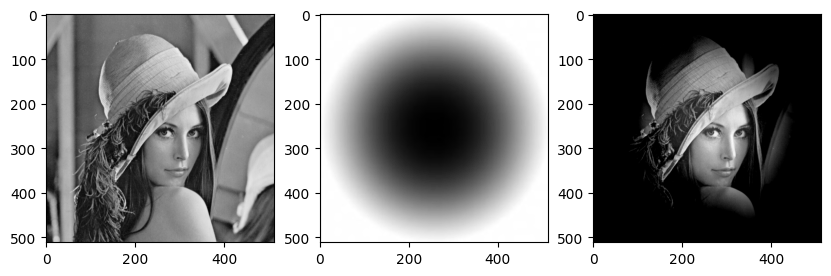

In [9]:
src1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/circle.jpg', cv2.IMREAD_GRAYSCALE)

src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.subtract(src1,src2)

fig = plt.figure(figsize = (10,7))

fig.add_subplot(1,3,1)
plt.imshow(src1, cmap = 'gray')

fig.add_subplot(1,3,2)
plt.imshow(src2, cmap = 'gray')

fig.add_subplot(1,3,3)
plt.imshow(dst, cmap = 'gray')

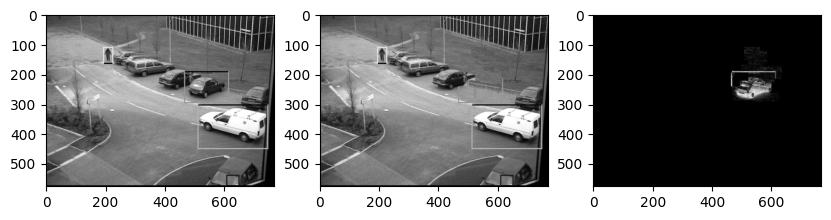

In [10]:
img1 = cv2.imread('/home/kkyu/amr_ws/opencv/data/road1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/home/kkyu/amr_ws/opencv/data/road2.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.absdiff(img1,img2)

fig = plt.figure(figsize=(10,7))

fig.add_subplot(1,3,1)
plt.imshow(img1 , cmap = 'gray')

fig.add_subplot(1,3,2)
plt.imshow(img2, cmap = 'gray')

fig.add_subplot(1,3,3)
plt.imshow(dst, cmap = 'gray')

In [11]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()  # 에러가 발생하고 나서 프로그램을 끝내겠다
    
alpha = 1.0
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()
    

![Screenshot from 2024-01-30 14-07-09.png](<attachment:Screenshot from 2024-01-30 14-07-09.png>)
![Screenshot from 2024-01-30 14-07-34.png](<attachment:Screenshot from 2024-01-30 14-07-34.png>)
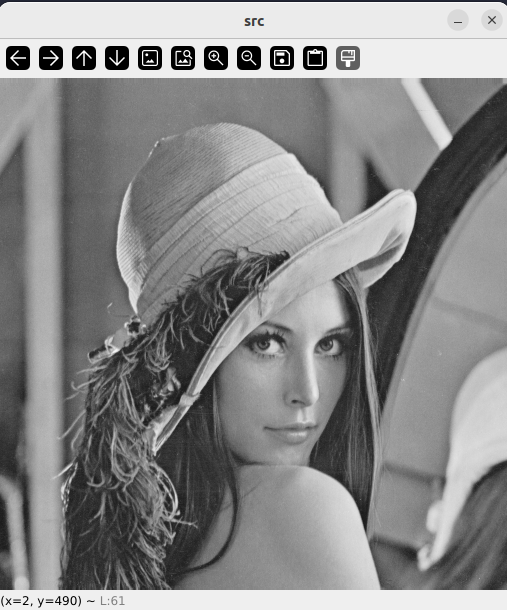
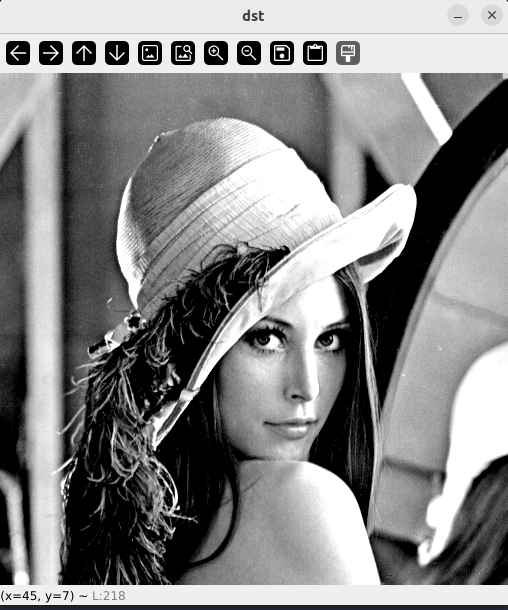

### 정규화 함수 

cv2.normalize(src, dst, alpha = None, beta = None, norm_type = None, dtype = None, mask = None) -> dst

- src : 입력 영상
- dst : 결과 영상
- alpha : (노름 정규화인 경우) 목표 노름 값, (원소 값 범위 정규화인 경우) 최솟값
- beta : (원소 값 범위 정규화인 경우) 최댓값
- norm_type : 정규화 타입. NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX
- dtype : 결과 영상의 타입
- mask : 마스크 영상

In [12]:
src = cv2.imread('/home/kkyu/amr_ws/opencv/data/Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

![Screenshot from 2024-01-30 14-05-00.png](<attachment:Screenshot from 2024-01-30 14-05-00.png>)
![Screenshot from 2024-01-30 14-05-52.png](<attachment:Screenshot from 2024-01-30 14-05-52.png>)
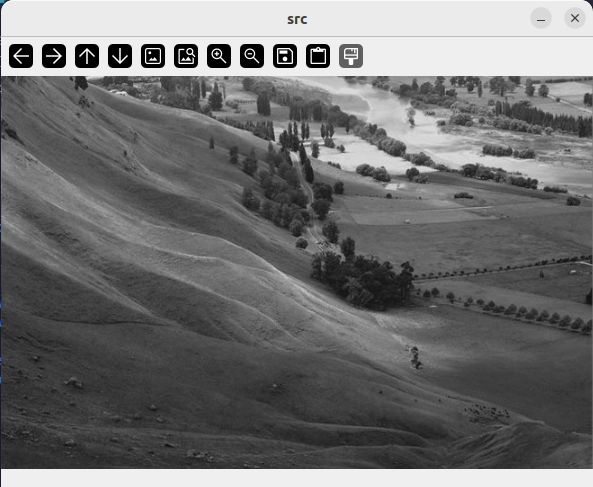
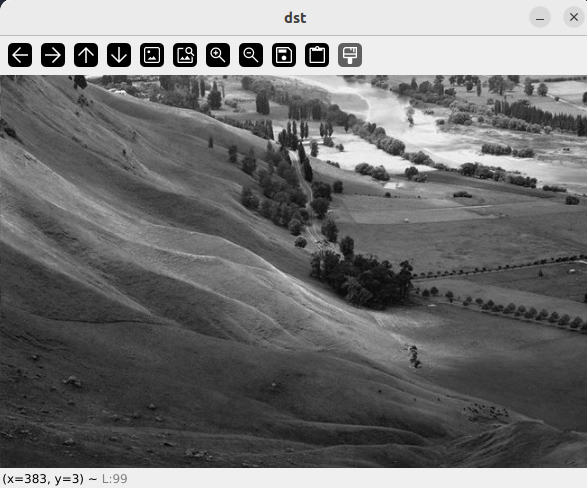